# Sea Level Data 

In [1]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [2]:
sea_data = pd.read_csv('data/GMSL_merged_nasa_1993_2020.csv')
# sea_data 
sea_data.head(20)

# sea_level = sea_data['GMSL'].values
# sea_level

,year_fraction,gmsl
0,1993.011526,92.66
1,1993.038692,95.39
2,1993.065858,92.29
3,1993.093025,96.20
4,1993.120191,94.64
5,1993.147357,93.22
6,1993.174523,91.67
7,1993.201689,91.95
8,1993.228855,91.70
9,1993.256021,101.31


In [3]:
from datetime import timedelta, datetime



In [4]:
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*365.25)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

In [5]:
sea_data['date'] = sea_data['year_fraction'].apply(convert_partial_year)
sea_data

,year_fraction,gmsl,date
0,1993.011526,92.66,1993-01-05 05:02:12.897607
1,1993.038692,95.39,1993-01-15 03:10:26.659203
2,1993.065858,92.29,1993-01-25 01:18:40.420798
3,1993.093025,96.20,1993-02-03 23:27:25.739997
4,1993.120191,94.64,1993-02-13 21:35:39.501599
...,...,...,...
991,2019.943911,105.40,2019-12-11 18:19:25.773595
992,2019.971077,101.96,2019-12-21 16:27:39.535198
993,2019.998243,100.10,2019-12-31 14:35:53.296800
994,2020.025340,98.39,2020-01-10 06:07:49.583997


In [6]:
sea_data_1 = sea_data.drop(['year_fraction'], axis=1)
sea_data_1

,gmsl,date
0,92.66,1993-01-05 05:02:12.897607
1,95.39,1993-01-15 03:10:26.659203
2,92.29,1993-01-25 01:18:40.420798
3,96.20,1993-02-03 23:27:25.739997
4,94.64,1993-02-13 21:35:39.501599
...,...,...
991,105.40,2019-12-11 18:19:25.773595
992,101.96,2019-12-21 16:27:39.535198
993,100.10,2019-12-31 14:35:53.296800
994,98.39,2020-01-10 06:07:49.583997


In [7]:
sea_data_1['year'] = sea_data_1['date'].apply(lambda x: x.year)
sea_data_1

,gmsl,date,year
0,92.66,1993-01-05 05:02:12.897607,1993
1,95.39,1993-01-15 03:10:26.659203,1993
2,92.29,1993-01-25 01:18:40.420798,1993
3,96.20,1993-02-03 23:27:25.739997,1993
4,94.64,1993-02-13 21:35:39.501599,1993
...,...,...,...
991,105.40,2019-12-11 18:19:25.773595,2019
992,101.96,2019-12-21 16:27:39.535198,2019
993,100.10,2019-12-31 14:35:53.296800,2019
994,98.39,2020-01-10 06:07:49.583997,2020


In [8]:
sea_data_2 = sea_data_1.drop(['date'], axis=1)
sea_data_2

,gmsl,year
0,92.66,1993
1,95.39,1993
2,92.29,1993
3,96.20,1993
4,94.64,1993
...,...,...
991,105.40,2019
992,101.96,2019
993,100.10,2019
994,98.39,2020


In [9]:
sea_data_2.columns = ['GMSL', 'Year']
sea_data_2

,GMSL,Year
0,92.66,1993
1,95.39,1993
2,92.29,1993
3,96.20,1993
4,94.64,1993
...,...,...
991,105.40,2019
992,101.96,2019
993,100.10,2019
994,98.39,2020


In [10]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [11]:
data = sea_data_2 # load data set
X = data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


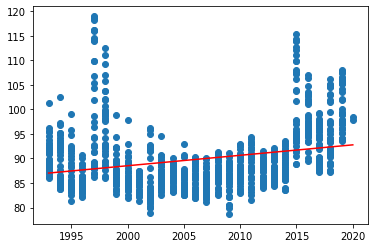

In [12]:

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

This visualization shows the model looking at every datapoint taken for the global mass sea level average as it was measured each day. 

This is the “uncertainty margin,” or the range from the mean (average) within which there is a high probability that the true number resides. For example, when we say that global mean sea level for a particular month is 50mm +/- 4 mm, the true value for that month has a high probability of being between 46 and 54 mm. The uncertainty margin exists both because of sea level variability (sea level above the first point in the time series) in the ocean and the accuracy with which we measure the individual values. https://sealevel.nasa.gov/understanding-sea-level/key-indicators/global-mean-sea-level/  Source: https://podaac-tools.jpl.nasa.gov/drive/files/allData/merged_alt/L2/TP_J1_OSTM/global_mean_sea_level/GMSL_TPJAOS_4.2_199209_202001.txt